# Exploratory Data Analysis for the QM9 Dataset

To get a feel for the dataset, it is helpful to start by visualising both the molecular graphs as well as the distribution of properties (like HOMO-LUMO). We can also visualise correlations between different properties to identify which targets might be most helpful, but since this is a toy project, we will skip this for now.

In [15]:
import torch_geometric as pyg
from torch_geometric.datasets import QM9
from torch_geometric.data import DataLoader
import mygenai
from rdkit import Chem
from IPython.display import SVG

# using the QM9 dataset, as it includes quantum properties and is of modest size
dataset = QM9(root="../data/QM9")

## Molecule Visualisation

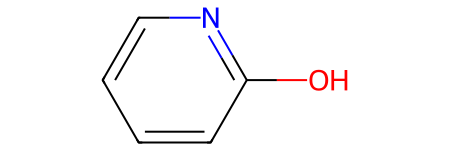

In [16]:
# illustrate use of visualisation tools
m = Chem.MolFromSmiles('c1cccnc1O')
SVG(mygenai.utils.moltosvg(m))

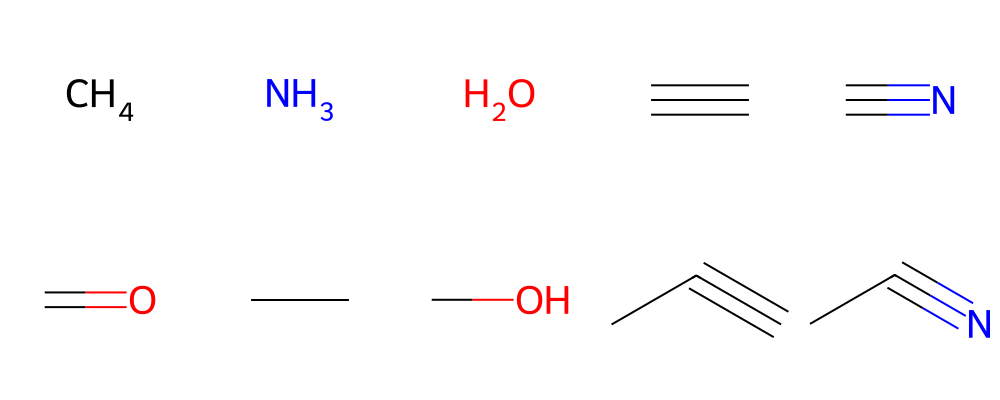

In [17]:
# visualise the top 10 molecules in the dataset
num_viz = 10
mols = [mygenai.utils.to_rdkit(dataset[i]) for i in range(num_viz)]
Chem.Draw.MolsToGridImage(mols, molsPerRow=5)

In [18]:
# 3d visualisation of first molecule
test_mol = dataset[0]
mygenai.utils.visualise_molecule(test_mol)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [19]:
# 3d visualisation of a more complex molecule
test_mol = dataset[10000]
mygenai.utils.visualise_molecule(test_mol)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

## Data Distribution Visualisation

In [20]:
# basic statistics
print(f"Total graphs: {len(dataset)}")

num_nodes = [data.num_nodes for data in dataset]
num_edges = [data.num_edges for data in dataset]

print(f"Avg nodes per graph: {sum(num_nodes) / len(num_nodes):.2f}")
print(f"Avg edges per graph: {sum(num_edges) / len(num_edges):.2f}")

Total graphs: 130831


KeyboardInterrupt: 

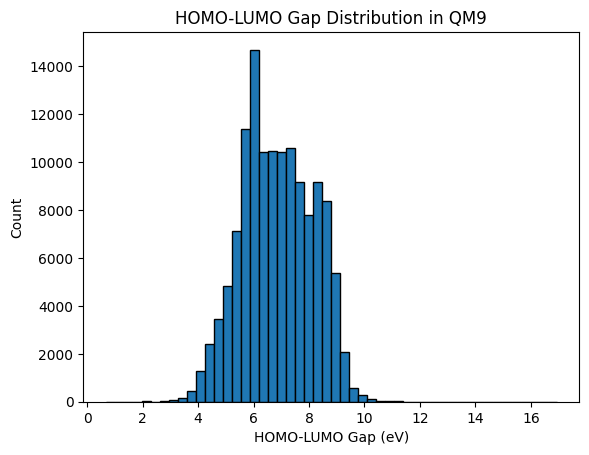

In [ ]:
# HOMO-LUMO distribution
import matplotlib.pyplot as plt
import torch
homo_lumo_gaps = torch.cat([data.y[:, 4] for data in dataset])  # Column 4 is HOMO-LUMO gap

plt.hist(homo_lumo_gaps.numpy(), bins=50, edgecolor="black")
plt.xlabel("HOMO-LUMO Gap (eV)")
plt.ylabel("Count")
plt.title("HOMO-LUMO Gap Distribution in QM9")
plt.show()

/home/jph/dev/generative-molecular-design/.conda/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


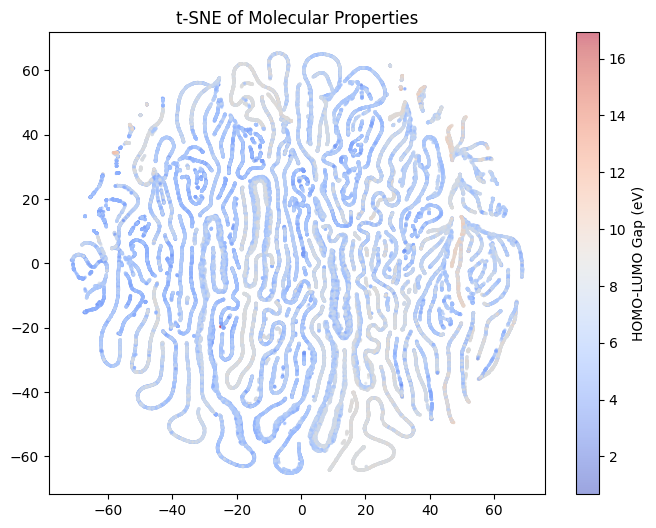

In [22]:
# use PCA to reduce dimensionality to 5D
# then tSNE to reduce to 2D
# colour code according to HOMO-LUMO gap to
# get an idea of the distribution

import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# graph/molecule/target properties
Y = torch.cat([data.y for data in dataset], dim=0).numpy()

homo_lumo_gap = Y[:, 4]

pca = PCA(n_components=4)
Y_pca = pca.fit_transform(Y)

# Apply t-SNE on reduced 5D space
tsne = TSNE(n_components=2, perplexity=50, random_state=42, n_jobs=16, method='barnes_hut', max_iter=500)
Y_embedded = tsne.fit_transform(Y_pca)

plt.figure(figsize=(8, 6))
plt.scatter(Y_embedded[:, 0], Y_embedded[:, 1], c=homo_lumo_gap, cmap="coolwarm", alpha=0.5, s=2)
plt.colorbar(label="HOMO-LUMO Gap (eV)")
plt.title("t-SNE of Molecular Properties")
plt.show()